[ 1.         -0.41421356 -0.41421356  1.        ] [ 1.  -0.5]
[1. 1. 1. 1.] [ 1.  -0.3]
[ 1.         -0.84775907 -0.84775907  1.        ] [ 1.  -0.9]


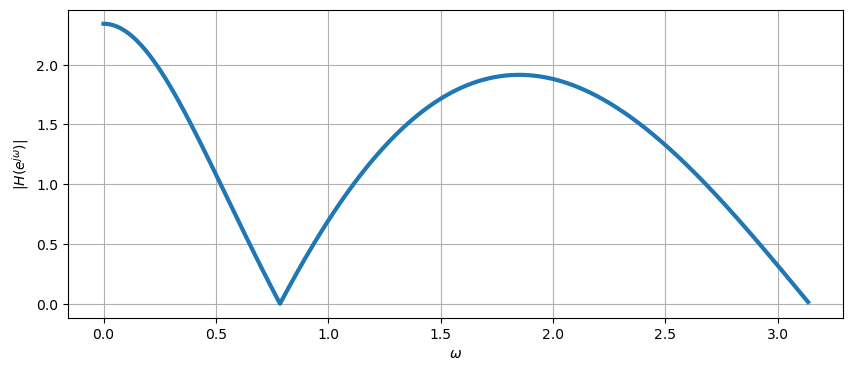

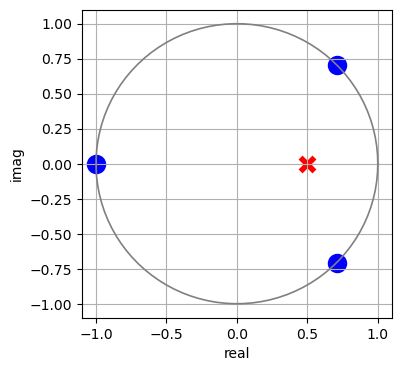

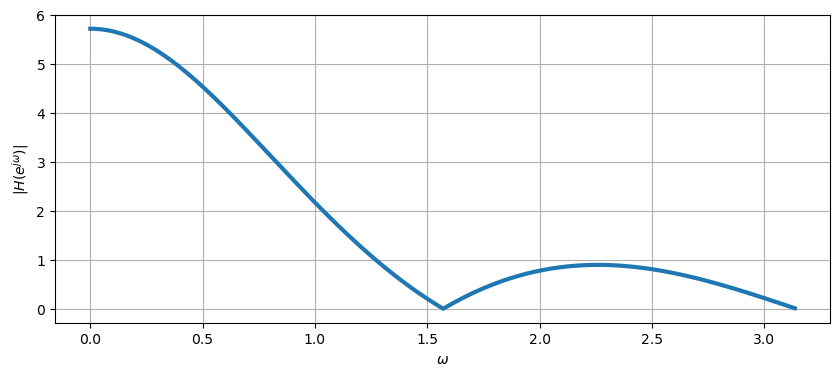

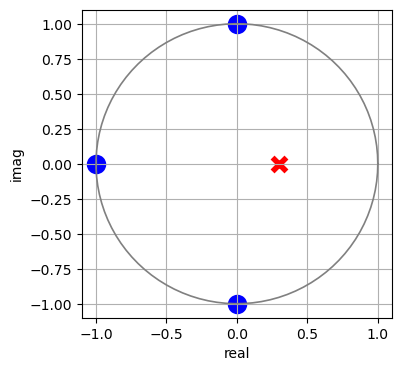

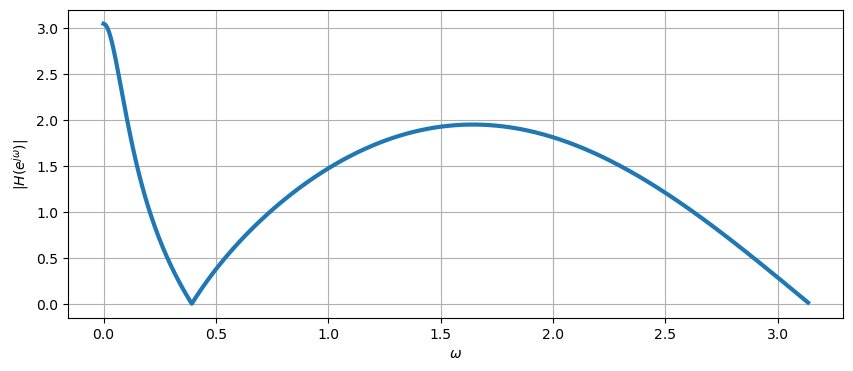

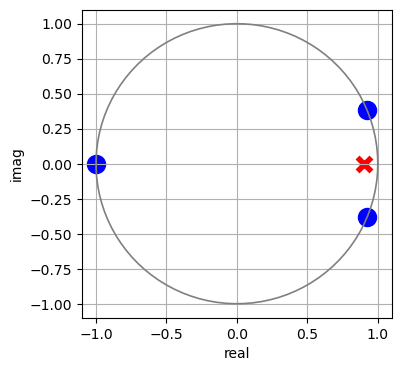

In [76]:
# zkouska  2024-25 - radny 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, freqs, decimate, convolve2d 

# ---------------- 3 filtr -------------------
ang = np.linspace(0, 2*np.pi, 100)
p = [0.5]
frekv = np.pi/4
n = [np.exp(1j * frekv), np.exp(-1j * frekv), -1]

b = np.poly(n)
a = np.poly(p)
print(b,a)
om,H = freqz(b,a,512)
fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
fig.savefig('fig/3_1f.eps',bbox_inches='tight')

# jednotkova kruznice
fig=plt.figure(figsize=(4,4)); 
plt.plot(np.cos(ang), np.sin(ang), linewidth=1.2, color='gray')
plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='poles', s=100, linewidths=4)
plt.scatter(np.real(n), np.imag(n), marker='o', color='b', label='poles', s=100, linewidths=4)
fig.gca().grid(); fig.gca().set_xlabel('real'); fig.gca().set_ylabel('imag');       
fig.savefig('fig/3_1z.eps',bbox_inches='tight')

# --- 
p = [0.3]
frekv = np.pi/2
n = [np.exp(1j * frekv), np.exp(-1j * frekv), -1]

b = np.poly(n)
a = np.poly(p)
print(b,a)
om,H = freqz(b,a,512)
fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
fig.savefig('fig/3_2f.eps',bbox_inches='tight')

# jednotkova kruznice
fig=plt.figure(figsize=(4,4)); 
plt.plot(np.cos(ang), np.sin(ang), linewidth=1.2, color='gray')
plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='poles', s=100, linewidths=4)
plt.scatter(np.real(n), np.imag(n), marker='o', color='b', label='poles', s=100, linewidths=4)
fig.gca().grid(); fig.gca().set_xlabel('real'); fig.gca().set_ylabel('imag');       
#fig.savefig('fig/3_2z.eps',bbox_inches='tight')

# ---
p = [0.9]
frekv = np.pi/8
n = [np.exp(1j * frekv), np.exp(-1j * frekv), -1]

b = np.poly(n)
a = np.poly(p)
print(b,a)
om,H = freqz(b,a,512)
fig=plt.figure(figsize=(10,4)); plt.plot(om, np.abs(H), linewidth=3); 
fig.gca().set_xlabel('$\omega$'); fig.gca().set_ylabel('$|H(e^{j\omega})|$'); fig.gca().grid()
#fig.savefig('fig/3_3f.eps',bbox_inches='tight')

# jednotkova kruznice
fig=plt.figure(figsize=(4,4)); 
plt.plot(np.cos(ang), np.sin(ang), linewidth=1.2, color='gray')
plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='poles', s=100, linewidths=4)
plt.scatter(np.real(n), np.imag(n), marker='o', color='b', label='poles', s=100, linewidths=4)
fig.gca().grid(); fig.gca().set_xlabel('real'); fig.gca().set_ylabel('imag');       
#fig.savefig('fig/3_3z.eps',bbox_inches='tight')

In [73]:
# ----------- 4 konvol 
x = [1,2,3]; h = [1,0,3]; print(np.convolve(x,h))
x = [1,2,3]; h = [1,0,-1]; print(np.convolve(x,h))
x = [1,2,3]; h = [1,0,-2]; print(np.convolve(x,h))
x = [1,2,3]; h = [1,0,2]; print(np.convolve(x,h))

[1 2 6 6 9]
[ 1  2  2 -2 -3]
[ 1  2  1 -4 -6]
[1 2 5 4 6]


In [67]:
# --- 10 vykon ---
x = [1,2,3,-1,-2,-3,4,4]
Ps = np.sum(np.power(x,2)) / 8
print (Ps)

7.5


In [74]:
# ------- 11 SNR -------
Puseful = 1/3 * 1 + 1/3 * 1 # zero does not count 
Perror = 1/3 * 0.25 + 1/3 * 0.25 + 1/3 * 0.25 # zero does count 
print (Puseful, Perror, 10*np.log10(Puseful / Perror))

0.6666666666666666 0.25 4.259687322722811


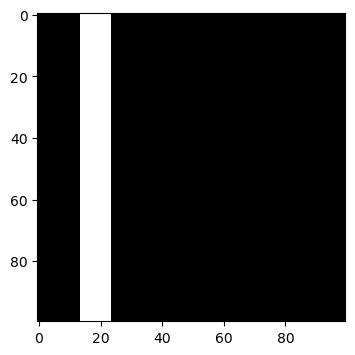

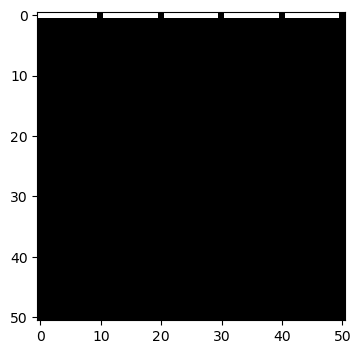

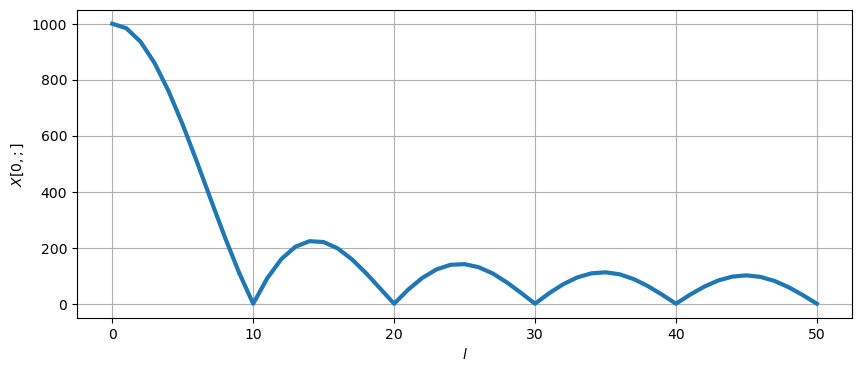

In [72]:
# ---- 14 2d dft ----
x = np.zeros([100,100])
x[:,14:24] = 1
fig=plt.figure(figsize=(4,4)); plt.imshow(x, 'gray', vmin=0, vmax=1); 
X = np.abs(np.fft.fft2(x)); X= X[:51,:51]
fig=plt.figure(figsize=(4,4)); plt.imshow(X, 'gray', vmin=0, vmax=1); 
fig=plt.figure(figsize=(10,4)); plt.plot(X[0,:], linewidth=3); 
fig.gca().set_xlabel('$l$'); fig.gca().set_ylabel('$X[0,;]$'); fig.gca().grid()



In [61]:
# -------- 16 f rada ----------- 
theta = 1e-6
T1 = 2e-6
D = 5
om1 = 2 * np.pi / T1
k = np.arange(4)
argssinc = theta /2 * k * om1 
ck =  D * theta / T1 * np.sinc(argssinc / np.pi) # pozor sinc ... 
print (argssinc, np.sinc(argssinc / np.pi), ck)

[0.         1.57079633 3.14159265 4.71238898] [ 1.00000000e+00  6.36619772e-01 -2.43734253e-16 -2.12206591e-01] [ 2.50000000e+00  1.59154943e+00 -6.09335633e-16 -5.30516477e-01]


In [62]:
# ----- 19 stability 
a = [1, 2, 1]; print (np.roots(a))
a = [1, -2, 1]; print (np.roots(a))
a = [1, 0, 4]; print (np.roots(a))
a = [1, 0, 1]; print (np.roots(a))

[-1. -1.]
[1. 1.]
[-0.+2.j  0.-2.j]
[-0.+1.j  0.-1.j]
